In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

第一个图是随机特征编码，第二个是真实特征

train_loss	val_loss	test_auc	test_avg_pre

In [2]:
key = 'train_loss'
nd = pd.DataFrame()
for seed in range(43, 53):
    data = pd.read_csv(f'data/result/pyg/Random_feat_{seed}.csv')
    nd[seed] = data[key]
nd['mean'] = nd.mean(axis=1)
nd['max'] = nd.max(axis=1)
nd['min'] = nd.min(axis=1)

key = 'val_loss'
nd1 = pd.DataFrame()
for seed in range(43, 53):
    data = pd.read_csv(f'data/result/pyg/Random_feat_{seed}.csv')
    nd1[seed] = data[key]
nd1['mean'] = nd1.mean(axis=1)
nd1['max'] = nd1.max(axis=1)
nd1['min'] = nd1.min(axis=1)

key = 'test_auc'
nd2 = pd.DataFrame()
for seed in range(43, 53):
    data = pd.read_csv(f'data/result/pyg/Random_feat_{seed}.csv')
    nd2[seed] = data[key]
nd2['mean'] = nd2.mean(axis=1)
nd2['max'] = nd2.max(axis=1)
nd2['min'] = nd2.min(axis=1)

key = 'test_avg_pre'
nd3 = pd.DataFrame()
for seed in range(43, 53):
    data = pd.read_csv(f'data/result/pyg/Random_feat_{seed}.csv')
    nd3[seed] = data[key]
nd3['mean'] = nd3.mean(axis=1)
nd3['max'] = nd3.max(axis=1)
nd3['min'] = nd3.min(axis=1)

In [3]:
def smooth(data: pd.Series):
    smooth_data = data.ewm(alpha=0.2).mean()
    return smooth_data

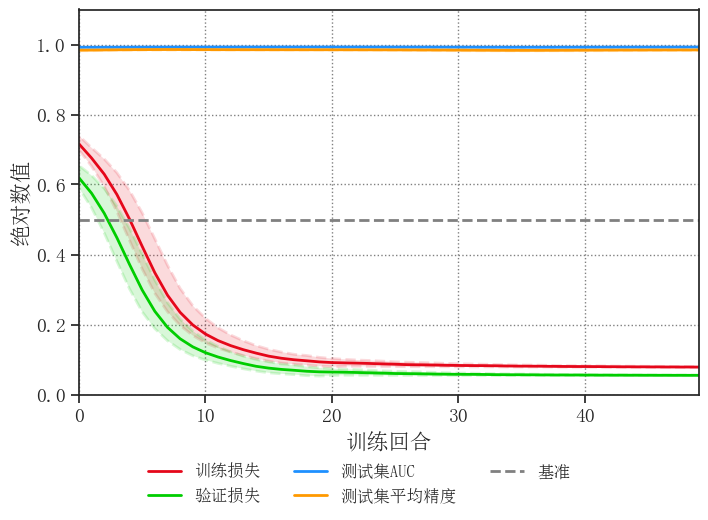

In [4]:
colors = ['#e5071a', '#00CD00', '#1e90ff', '#FF9900', '#fd79a8', '#8074b2', '#636e72']

plt.figure(figsize=(8, 5))
ax = sns.set_theme(style='ticks', font_scale=1.3)
config = {
    "font.family":'serif',
    "font.size": 18,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
plt.rcParams.update(config)

plt.grid(ls=':', color='grey', lw=1)
plt.xlabel('训练回合')  # x轴标签
plt.ylabel('绝对数值')  # y轴标签
plt.ylim((0, 1.1))  # 调整y轴范围，建议先不写，先画默认图，再手动调整
plt.xlim((0, 49))  # 调整x轴范围，同上
y = nd['mean']
min_y = nd['min']
max_y = nd['max']
x = range(len(y))
plt.fill_between(x, smooth(min_y), smooth(max_y), alpha=0.15, linestyle='--', color='#e5071a', lw=2)  # 填充极大极小值
sns.lineplot(x=x, y=smooth(y), lw=2, color='#e5071a', label='训练损失')

y = nd1['mean']
min_y = nd1['min']
max_y = nd1['max']
x = range(len(y))
plt.fill_between(x, smooth(min_y), smooth(max_y), alpha=0.15, linestyle='--', color='#00CD00', lw=2)  # 填充极大极小值
sns.lineplot(x=x, y=smooth(y), lw=2, color='#00CD00', label='验证损失')

y = nd2['mean']
min_y = nd2['min']
max_y = nd2['max']
x = range(len(y))
plt.fill_between(x, smooth(min_y), smooth(max_y), alpha=0.15, linestyle='--', color='#1e90ff', lw=2)  # 填充极大极小值
sns.lineplot(x=x, y=smooth(y), lw=2, color='#1e90ff', label='测试集AUC')

y = nd3['mean']
min_y = nd3['min']
max_y = nd3['max']
x = range(len(y))
plt.fill_between(x, smooth(min_y), smooth(max_y), alpha=0.15, linestyle='--', color='#FF9900', lw=2)  # 填充极大极小值
sns.lineplot(x=x, y=smooth(y), lw=2, color='#FF9900', label='测试集平均精度')


plt.axhline(y=0.5, color='gray', linestyle='--', label='基准', lw=2)
plt.legend(loc=(0.1, -0.3), ncol=3, fontsize=12, frameon=False)
plt.savefig('image/final_figure_1.pdf', bbox_inches='tight')

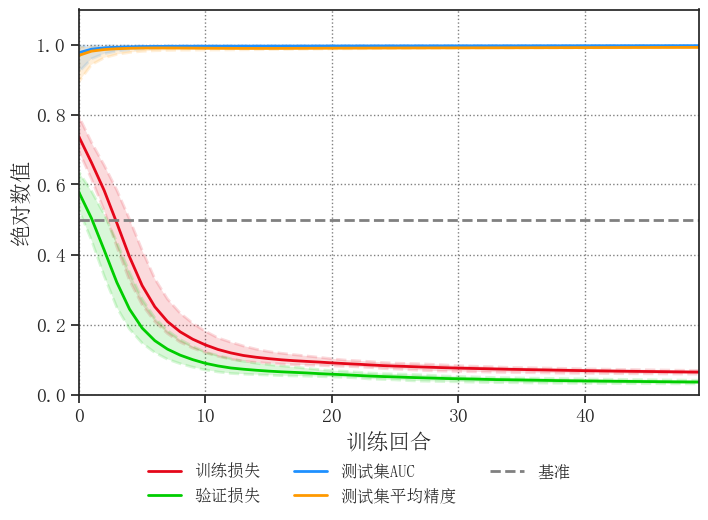

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def smooth(data: pd.Series):
    smooth_data = data.ewm(alpha=0.2).mean()
    return smooth_data

key = 'train_loss'
nd = pd.DataFrame()
for seed in range(43, 53):
    data = pd.read_csv(f'data/result/pyg/Real_feat_{seed}.csv')
    nd[seed] = data[key]
nd['mean'] = nd.mean(axis=1)
nd['max'] = nd.max(axis=1)
nd['min'] = nd.min(axis=1)

key = 'val_loss'
nd1 = pd.DataFrame()
for seed in range(43, 53):
    data = pd.read_csv(f'data/result/pyg/Real_feat_{seed}.csv')
    nd1[seed] = data[key]
nd1['mean'] = nd1.mean(axis=1)
nd1['max'] = nd1.max(axis=1)
nd1['min'] = nd1.min(axis=1)

key = 'test_auc'
nd2 = pd.DataFrame()
for seed in range(43, 53):
    data = pd.read_csv(f'data/result/pyg/Real_feat_{seed}.csv')
    nd2[seed] = data[key]
nd2['mean'] = nd2.mean(axis=1)
nd2['max'] = nd2.max(axis=1)
nd2['min'] = nd2.min(axis=1)

key = 'test_avg_pre'
nd3 = pd.DataFrame()
for seed in range(43, 53):
    data = pd.read_csv(f'data/result/pyg/Real_feat_{seed}.csv')
    nd3[seed] = data[key]
nd3['mean'] = nd3.mean(axis=1)
nd3['max'] = nd3.max(axis=1)
nd3['min'] = nd3.min(axis=1)

colors = ['#e5071a', '#00CD00', '#1e90ff', '#FF9900', '#fd79a8', '#8074b2', '#636e72']

plt.figure(figsize=(8, 5))
ax = sns.set_theme(style='ticks', font_scale=1.3)
config = {
    "font.family":'serif',
    "font.size": 18,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
plt.rcParams.update(config)

plt.grid(ls=':', color='grey', lw=1)
plt.xlabel('训练回合')  # x轴标签
plt.ylabel('绝对数值')  # y轴标签
plt.ylim((0, 1.1))  # 调整y轴范围，建议先不写，先画默认图，再手动调整
plt.xlim((0, 49))  # 调整x轴范围，同上
y = nd['mean']
min_y = nd['min']
max_y = nd['max']
x = range(len(y))
plt.fill_between(x, smooth(min_y), smooth(max_y), alpha=0.15, linestyle='--', color='#e5071a', lw=2)  # 填充极大极小值
sns.lineplot(x=x, y=smooth(y), lw=2, color='#e5071a', label='训练损失')

y = nd1['mean']
min_y = nd1['min']
max_y = nd1['max']
x = range(len(y))
plt.fill_between(x, smooth(min_y), smooth(max_y), alpha=0.15, linestyle='--', color='#00CD00', lw=2)  # 填充极大极小值
sns.lineplot(x=x, y=smooth(y), lw=2, color='#00CD00', label='验证损失')

y = nd2['mean']
min_y = nd2['min']
max_y = nd2['max']
x = range(len(y))
plt.fill_between(x, smooth(min_y), smooth(max_y), alpha=0.15, linestyle='--', color='#1e90ff', lw=2)  # 填充极大极小值
sns.lineplot(x=x, y=smooth(y), lw=2, color='#1e90ff', label='测试集AUC')

y = nd3['mean']
min_y = nd3['min']
max_y = nd3['max']
x = range(len(y))
plt.fill_between(x, smooth(min_y), smooth(max_y), alpha=0.15, linestyle='--', color='#FF9900', lw=2)  # 填充极大极小值
sns.lineplot(x=x, y=smooth(y), lw=2, color='#FF9900', label='测试集平均精度')


plt.axhline(y=0.5, color='gray', linestyle='--', label='基准', lw=2)
plt.legend(loc=(0.1, -0.3), ncol=3, fontsize=12, frameon=False)
plt.savefig('image/final_figure_2.pdf', bbox_inches='tight')

# 客户特征统计

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('data/customers.csv')

C:\Users\Bowen\AppData\Local\Temp\ipykernel_23424\1620243168.py:1: DtypeWarning: Columns (8,14,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/customers.csv')


In [4]:
data.head()

,id,客户id,客户名称,客户类型(更新),客户类型,推广经理,当前状态,连锁标记,连锁标记(更新),客户所在省,...,是否医保店,客户等级,客户店员数,经营品种数,位置类型,位置类型(更新),注册日期,是否有过投诉,连锁标记(更新2),是否样本
0,22381f4a-027f-4c3e-a588-a08a266e9c0f,7.081090e+18,桥西****结合诊所,诊所,诊所,平志红,启用,NaN,NaN,河北省,...,是,60万-70万,2.0,806.0,诊所,诊所,05:01.9,否,不连锁,1
1,32721fcf-71b3-416b-91fd-57a1d9fba430,6.970900e+18,武胜****生服务站,卫生服务站,诊所,杨茜,启用,NaN,NaN,四川省,...,是,50万-60万,3.0,180.0,院边店,院边店,11:28.4,是,不连锁,1
2,a3cd0d22-a66f-4791-9ef3-950347f4dff3,6.970900e+18,岳池****生服务站,卫生服务站,诊所,刘璐,启用,NaN,NaN,四川省,...,是,50万-60万,5.0,750.0,院边店,院边店,40:57.8,否,不连锁,1
3,ffe7cf09-172e-453a-89b0-b87ccdc14ec0,6.970900e+18,老僧****生服务站,卫生服务站,诊所,郝苗苗,启用,NaN,NaN,山东省,...,否,10万以下,4.0,30.0,院边店,院边店,42:34.1,是,不连锁,1
4,b3f741d1-9e91-47a7-8597-a0fd3f5e5561,6.970900e+18,叙永****生服务站,卫生服务站,诊所,游凯,启用,NaN,NaN,四川省,...,是,10万以下,2.0,0.0,院边店,院边店,30:33.1,是,不连锁,1


In [7]:
data['客户所在省'].value_counts()

客户所在省
河南省         35199
山东省         31821
河北省         24003
四川省         23218
广东省         18367
湖南省         17089
湖北省         16113
安徽省         14888
江西省         12803
广西壮族自治区     11626
山西省         10904
陕西省         10502
辽宁省         10255
贵州省         10248
江苏省         10114
重庆市          9893
云南省          9430
福建省          8280
黑龙江省         7997
内蒙古自治区       7883
吉林省          7802
浙江省          6796
甘肃省          6446
新疆维吾尔自治区     3778
青海省          1608
海南省          1535
宁夏回族自治区      1226
天津市          1157
西藏自治区         578
北京市            79
香港特别行政区         6
上海市             5
澳门特别行政区         1
Name: count, dtype: int64

In [ ]:
3500, 10500, 17500, 24500, 31500

澳门, 上海市, 香港, 北京, 西藏, 天津市, 宁夏, 海南省, 青海省

新疆, 甘肃, 浙江, 吉林, 内蒙古, 黑龙江, 福建, 云南, 重庆, 江苏, 贵州, 辽宁, 陕西

山西, 广西, 江西, 安徽, 湖北, 湖南

广东, 四川, 河北,山东

河南